In [1]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
Nhanes_ds = pd.read_csv("datasets/Nhanes.csv")

vars = ["BPXSY1", "RIDAGEYR", "RIAGENDR", "RIDRETH1", "DMDEDUC2", "BMXBMI", "SMQ020"]
Nhanes_ds = Nhanes_ds[vars]

In [3]:
Nhanes_ds["SMQx"] = Nhanes_ds.SMQ020.replace({2 : 0 , 7 : np.nan , 9 : np.nan})
Nhanes_ds.dropna()

,BPXSY1,RIDAGEYR,RIAGENDR,RIDRETH1,DMDEDUC2,BMXBMI,SMQ020,SMQx
0,128.0,62,1,3,5.0,27.8,1,1.0
1,146.0,53,1,3,3.0,30.8,1,1.0
2,138.0,78,1,3,3.0,28.8,1,1.0
3,132.0,56,2,3,5.0,42.4,2,0.0
4,100.0,42,2,4,4.0,20.3,2,0.0
...,...,...,...,...,...,...,...,...
5730,112.0,76,2,3,3.0,21.5,1,1.0
5731,118.0,26,1,3,5.0,33.8,2,0.0
5732,154.0,80,2,3,4.0,31.0,1,1.0
5733,104.0,35,1,3,1.0,26.0,1,1.0


Odds and LogOdds

In [4]:
Nhanes_ds["RIAGENDRx"] = Nhanes_ds.RIAGENDR.replace({1: "Male", 2: "Female"})
C = pd.crosstab(Nhanes_ds.RIAGENDRx , Nhanes_ds.SMQx).apply(lambda x:x/x.sum(), axis = 1)
C["Odds"] = C.iloc[:,1] / C.iloc[:,0]
C["LogOdds"] = np.log(C.Odds)
C

SMQx,0.0,1.0,Odds,LogOdds
RIAGENDRx,,,,
Female,0.695155,0.304845,0.438529,-0.824330
Male,0.486742,0.513258,1.054478,0.053045


probability of women smoking 100 cigrettes is pretty low than that of men. This is reflected in the Odds being very less than 1 for women  and being more than 1 for men. Logodds for women is negative suggesting that very less population of women have ever smoked 100 cigrate while log odds for men is close to 1 suggesting nearly half the population has smoked more than 100 cigrettes.

In [5]:
model1 = sm.GLM.from_formula("SMQx ~ RIAGENDRx " , family = sm.families.Binomial(), data = Nhanes_ds)
result1 =  model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   SMQx   No. Observations:                 5725
Model:                            GLM   Df Residuals:                     5723
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3734.8
Date:                Sun, 06 Dec 2020   Deviance:                       7469.6
Time:                        22:52:08   Pearson chi2:                 5.72e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.8243      0.040    -20.687      0.000      -0.902      -0.746
RIAGENDRx[T.Male]     0.8774      0.055     15.908      0.000       0.769       0.985
=====================================================================================
"""

In [6]:
C.LogOdds.Male - C.LogOdds.Female

0.877375833376175

In [7]:
model2 = sm.GLM.from_formula("SMQx ~ RIAGENDRx + RIDAGEYR" , family = sm.families.Binomial(), data = Nhanes_ds)
result2 =  model2.fit()
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   SMQx   No. Observations:                 5725
Model:                            GLM   Df Residuals:                     5722
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3637.6
Date:                Sun, 06 Dec 2020   Deviance:                       7275.2
Time:                        22:52:10   Pearson chi2:                 5.73e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.8635      0.088    -21.259      0.000      -2.035      -1.692
RIAGENDRx[T.Male]     0.8978      0.056     15.967      0.000       0.788       1.008
RIDAGEYR              0.0211      0.002     13.720      0.000       0.018       0.024
=====================================================================================
"""

This suggest that  logodds of smoking increases as age increases smoking habbit by 0.0211. If comparing to adults of age difference 20 years the Logodds will be 0.422 units greater for older person in comparison to younger one. The odds will be exp(0.422) i.e 1.52 times greater than that of younger person.

As with linear regression, the roles of age and gender in the logistic regression model can be seen as being additive, but here the additivity is on the scale of log odds, not odds or probabilities. If we compare a 30 year old female to a 50 year old male, the log odds for the male being a smoker are 0.89 + 0.422 = 1.312 units greater than the log odds for the female being a smoker. The value of 0.89 in this expression is the change attributable to gender, and the value of 0.422 is the change attributable to age. Again, we can exponentiate to convert these effects from the log odds scale to the odds scale. Since exp(0.89 + 0.422) = exp(0.89)*exp(0.422) = 2.44*1.52 we can state that male gender is associated with a 3.72 fold increase in the odds of smoking, and 20 years of age is associated with a 1.52 fold increase in the odds for smoking. These two effects are multiplied when discussing the odds, so a 50 year old man has exp(1.312) = 3.72 fold greater odds of smoking than a 30 year old woman.

In [8]:
Nhanes_ds["DMDEDUC2x"] = Nhanes_ds.DMDEDUC2.replace({1: "lt9", 2: "x9_11", 3: "HS", 4: "SomeCollege",
                                       5: "College", 7: np.nan, 9: np.nan})

model3 = sm.GLM.from_formula("SMQx ~ RIDAGEYR + RIAGENDRx + DMDEDUC2x", family=sm.families.Binomial(), data=Nhanes_ds)
result3 = model3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   SMQx   No. Observations:                 5463
Model:                            GLM   Df Residuals:                     5456
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3421.3
Date:                Sun, 06 Dec 2020   Deviance:                       6842.6
Time:                        22:52:11   Pearson chi2:                 5.47e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -2.3330      0.111    -21.108      0.000      -2.550      -2.116
RIAGENDRx[T.Male]            0.9313      0.058     15.986      0.000       0.817       1.045
DMDEDUC2x[T.HS]              0.9345      0.087     10.761      0.000       0.764       1.105
DMDEDUC2x[T.SomeCollege]     0.8425      0.082     10.338      0.000       0.683       1.002
DMDEDUC2x[T.lt9]             0.2357      0.106      2.230      0.026       0.029       0.443
DMDEDUC2x[T.x9_11]           1.0745      0.103     10.426      0.000       0.872       1.276
RIDAGEYR                     0.0185      0.002     11.061      0.000       0.015       0.022
============================================================================================
"""

We see that the "Female" level of the gender variable, and the "College" level of the educational attainment variable are the reference levels, as they are not shown in the output above. We have discussed the gender and age variables above, but the educational attainment variable is new for us. All non-reference coefficients for the educational attainment are positive, while the College coefficient, as the reference coefficient, is exactly zero. Thus, we see that people with a college degree have the lowest rate of smoking, followed by people with less than 9 years of schooling, then (after a large gap) people with some college, then people with a high school degree (and no college), and finally (with the greatest rate of smoking), people with 9-11 years of schooling. The overall story here is that smoking rates are much lower for people who graduated from college or did not start high school, presumably for very different reasons. On the other hand, people with some high school, people who completed high school, and people who began but did not complete college have much higher rates of smoking. The odds ratio between the former and the latter group depends on the specific subgroups being compared, but can be almost 3 = exp(1.07).

As noted above when we were discussing linear regression, it is important to remember that a coefficient in a logistic regression are "conditional" on the other variables being held fixed. For example, the log odds ratio of 1.07 between people with 9-11 years of schooling and people who completed college applies only when comparing people with the same age and gender.

c:\users\prash\documents\ml\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


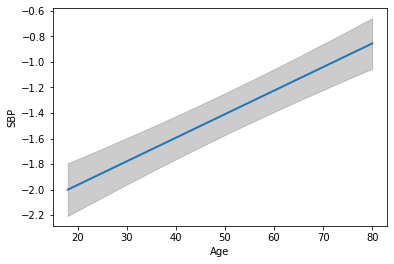

In [18]:
from statsmodels.sandbox.predict_functional import predict_functional

values = {"RIAGENDRx": "Female", "RIAGENDR": 1, "BMXBMI": 25,
          "DMDEDUC2": 1, "RIDRETH1": 1, "SMQ020": 1,
          "DMDEDUC2x": "College", "BPXSY1": 120}

Pr, Cb, fv = predict_functional(result3 , "RIDAGEYR",
                               values = values , ci_method="simultaneous")

ax = sns.lineplot(fv , Pr , lw = 2)
ax.fill_between(fv , Cb[:,1] , Cb[:,0], color = "grey" , alpha = 0.4)
ax.set_xlabel("Age")
_ = ax.set_ylabel("SBP")

The plot shows the fitted log odds (or logit) probability for the smoking outcome as a function of age. The grey band is a simultaneous 95% simultaneous confidence band.

c:\users\prash\documents\ml\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Smoking')

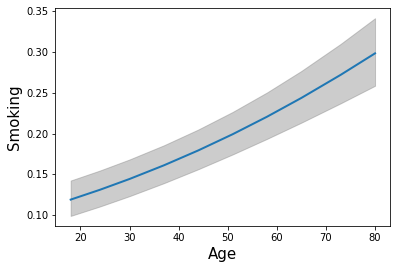

In [19]:
pr1 = 1/(1 + np.exp(-Pr))
cb1 = 1/(1 + np.exp(-Cb))
ax = sns.lineplot(fv , pr1 , lw = 2)
ax.fill_between(fv , cb1[:,1], cb1[:,0], color = "grey" , alpha = 0.4)
ax.set_xlabel("Age", size=15)
ax.set_ylabel("Smoking", size=15)

as age increases probability of smoking 100 cigrettes increases non-lineraly

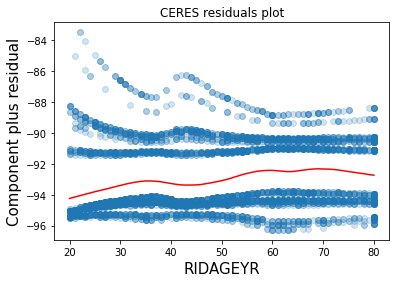

In [21]:
from statsmodels.graphics.regressionplots import add_lowess
fig = result3.plot_ceres_residuals("RIDAGEYR")
ax = fig.get_axes()[0]
ax.lines[0].set_alpha(0.2)
_ = add_lowess(ax)

The CERES technique has the strongest theoretical support. Taken at face value, the plot suggest that smoking rates may rise slightly faster for people between the ages of 20 and 35, and again for people between the ages of 50 and 60, with a period of minimal increase between these age intervals. This would contradict the perfectly linear model for age (on the log odds scale) that we have specified in our model. These plotting techniques can be useful at identifying possible opportunities for future analysis with additional data, but do not identify features that can be claimed with high confidence using the present data.